0. Imports

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Dataset Fetch

In [ ]:
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

In [ ]:
X['intercept'] = [1]*len(X)
X.head()

,sepal length,sepal width,petal length,petal width,intercept
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


2. Basic EDA

In [ ]:
pd.isna(X).sum(axis=0)

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
intercept,0


In [ ]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>],
       [<Axes: title={'center': 'intercept'}>, <Axes: >]], dtype=object)

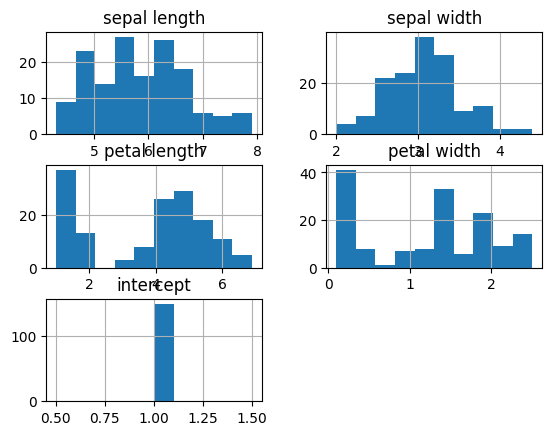

In [ ]:
X.hist()

<Axes: xlabel='class'>

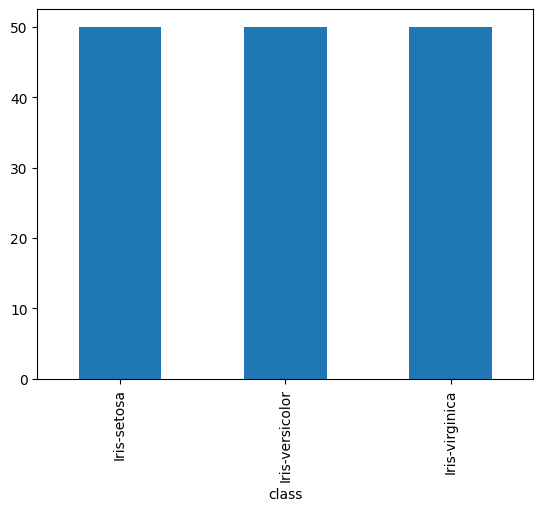

In [ ]:
#Label distribution using bar plot
y['class'].value_counts().plot.bar()

In [ ]:
oneHotEncoder = OneHotEncoder()
oneHotEncoder.fit(y)
Y = oneHotEncoder.transform(y).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

3. Train - Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")

(120, 5) (30, 5) (120, 3) (30, 3)


4. Logistic Regression For Classification

In [ ]:
class LogisticRegression():
  def __init__(self, num_epochs, learning_rate, batch_size):
    self.num_epochs = num_epochs
    self.learning_rate = learning_rate
    self.batch_size = batch_size

  def exponent(self, v):
    a = [np.exp(row) / np.sum(np.exp(row)) for row in v]
    return np.array(a)

  def update_rule(self, X, y):
      prediction = self.exponent(np.matmul(X, self.weights))
      return np.matmul(X.T, y-prediction)

  def calculate_loss(self, X, y):
    prediction = np.argmax(self.exponent(np.matmul(X, self.weights)), axis=1)
    actual = np.argmax(y, axis=1)
    return np.sum(prediction != actual)/len(X)


  def fit(self, X, y):
    """
    batch of (X,y) pairs
    """
    iteration = 0
    iterations_loss = []
    iterations = []
    #1. init weights
    self.weights = np.random.random(len(X[0])*len(y[0])).reshape((len(X[0]), len(y[0])))
    #2. iterate over #epochs, divide dataset into batches
    for epoch in range(0, self.num_epochs):
      #3. create batches
      batches_X = np.array(np.array_split(X, len(X)/self.batch_size))
      batches_y = np.array(np.array_split(y, len(y)/self.batch_size))
      loss = 0.0
      for batch_X, batch_y in zip(batches_X, batches_y):
        #4. for each batch, calculate loss
        loss += self.calculate_loss(batch_X, batch_y)
        #5. update weights
        self.weights += self.learning_rate*self.update_rule(batch_X, batch_y)
      #6. store loss
      iterations.append(epoch)
      iterations_loss.append(loss)
      #print(f"{epoch} : {loss}")
    #7. plot RMSE graph for training error rate
    plt.plot(iterations, iterations_loss)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error Rate')
    plt.show()

  def evaluate(self, X, y):
    return 1 - self.calculate_loss(X, y)

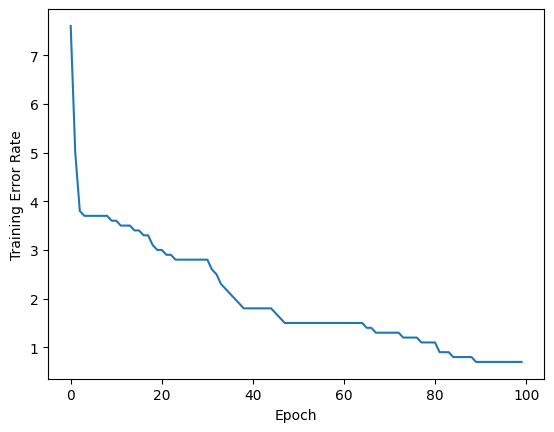

In [ ]:
lr = LogisticRegression(100, 0.001, 10)
lr.fit(X_train.to_numpy(), y_train)

In [ ]:
lr.evaluate(X_test.to_numpy(), y_test)

np.float64(0.9666666666666667)

In [ ]:
lr.evaluate(X_train.to_numpy(), y_train)

np.float64(0.9666666666666667)